Провести разведочный анализ данных (EDA) датасета Data Science Job Salaries взятого с Kaggle.com.
Проверить гипотезу, что зарплата специалистов уровня Junior меньше, чем специалистов уровня Senior.
По зарплате рассчитать основные статистические показатели: мода, медиана, квартили, дисперсию.
Подсчитать корреляцию между зарплатой, страной, компанией. Составить матрицу корреляции

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [53]:
data = pd.read_csv('ds_salaries.csv', encoding='cp1251')

In [54]:
data.shape

(607, 12)

In [55]:
data.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [57]:
unused_columns = ['Unnamed: 0']
data.drop(columns=unused_columns, inplace=True)

In [58]:
experience_level_dict = {'EN':'Entry Level/Junior', 
                         'MI':'Mid Level/Intermediate', 
                         'SE':'Senior Level/Expert', 
                         'EX':'Executive Level/Director'}

data['experience_level'] = data['experience_level'].map(experience_level_dict)

In [59]:
company_size_dict = {'S': 'Small',
                     'M': 'Medium',
                     'L': 'Large'}
data['company_size'] = data['company_size'].map(company_size_dict)

In [60]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level/Intermediate,FT,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2020,Senior Level/Expert,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,Senior Level/Expert,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,2020,Mid Level/Intermediate,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior Level/Expert,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


Десять наиболее популярных специальностей:

In [61]:
ten_most_needed_job_titles = data['job_title'].value_counts().head(10)
ten_most_needed_job_titles

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

В процентном отношении:

In [62]:
percent_top_ten = ten_most_needed_job_titles * 100 / data.shape[0]
percent_top_ten

Data Scientist                23.558484
Data Engineer                 21.746293
Data Analyst                  15.980231
Machine Learning Engineer      6.754530
Research Scientist             2.635914
Data Science Manager           1.976936
Data Architect                 1.812191
Big Data Engineer              1.317957
Machine Learning Scientist     1.317957
Principal Data Scientist       1.153213
Name: job_title, dtype: float64

Посмотрим распределение зарплат среди всех специалистов:

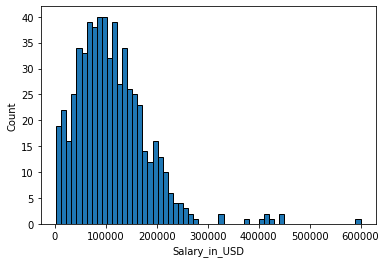

In [63]:
plt.hist(data['salary_in_usd'], bins=60, ec="black")
plt.xlabel('Salary_in_USD')
plt.ylabel('Count')
plt.show()

На гистограмме видим характерное похожее на колокол нормальное распределение. 

Посмотрим выбросы по зарплате:

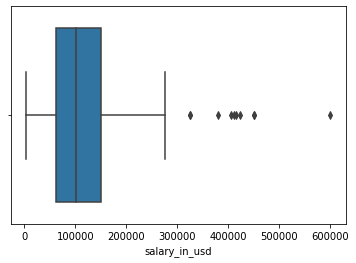

In [64]:
sns.boxplot(data['salary_in_usd'], orient='v')
plt.show()

Поработаем с выбросами:

In [65]:
data['salary_in_usd'].value_counts()

100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64

In [66]:
data['salary_in_usd'].quantile(0.975), data['salary_in_usd'].quantile(0.025)

(255100.00000000015, 12000.0)

Заменим выбросы медианой:

In [67]:
# condition = (data['salary_in_usd'] < data['salary_in_usd'].quantile(.025)) | (data['salary_in_usd'] > data['salary_in_usd'].quantile(.975))
condition = data['salary_in_usd'].isna() | (data['salary_in_usd'] > data['salary_in_usd'].quantile(0.975))
data.loc[condition, 'salary_in_usd'] = data['salary_in_usd'].median()

In [68]:
data['salary_in_usd'].value_counts()

101570    17
100000    15
150000    12
120000    12
200000    10
          ..
152000     1
74000      1
61896      1
26005      1
129000     1
Name: salary_in_usd, Length: 355, dtype: int64

Посмотрим отдельно статистики распределения зарплат всех специалистов.

Математическое ожидание:

In [69]:
salary_in_usd_mean = data['salary_in_usd'].mean()
salary_in_usd_mean

105463.80065897858

Мода:

In [70]:
data['salary_in_usd'].mode()

0    101570
dtype: int64

Медиана:

In [71]:
data['salary_in_usd'].median()

101570.0

Посчитаем среднее квадратичное отклонение в заработной плате:

In [72]:
salary_std = np.sqrt(((data['salary_in_usd'] - data['salary_in_usd'].mean())**2).sum() / data['salary_in_usd'].count())
salary_std

55845.05887757072

Либо используя функцию std():

In [73]:
data['salary_in_usd'].std(ddof=0)

55845.05887757072

Посчитаем несмещённую дисперсию:

In [74]:
salary_variance = ((data['salary_in_usd'] - data['salary_in_usd'].mean())**2).sum() / (data['salary_in_usd'].count() - 1)
salary_variance

3123816922.163168

Используя функцию var():

In [75]:
data['salary_in_usd'].var(ddof=1)

3123816922.163168

Найдём первый и третий квартили:

In [76]:
IQR1 = np.percentile(data['salary_in_usd'], 75)
IQR1

144000.0

In [77]:
IQR2 = np.percentile(data['salary_in_usd'], 25)
IQR2

62726.0

Интерквартильное расстояние:

In [78]:
IQR = np.percentile(data['salary_in_usd'], 75) - np.percentile(data['salary_in_usd'], 25)
IQR

81274.0

Найдём доверительный интервал для оценки математического ожидания с надежностью 0.95

Так как нам уже известно среднее квадратичное отклонение, используем правило двух сигм:

In [79]:
(salary_in_usd_mean - 2 * np.sqrt(salary_std / data['salary_in_usd'].count()), salary_in_usd_mean + 2 * np.sqrt(salary_std / data['salary_in_usd'].count()))

(105444.61715101532, 105482.98416694184)

Посмотрим зависимость уровня зарплат от опыта работы:

In [80]:
experience_order = ['Entry Level/Junior', 'Mid Level/Intermediate', 'Senior Level/Expert', 'Executive Level/Director']

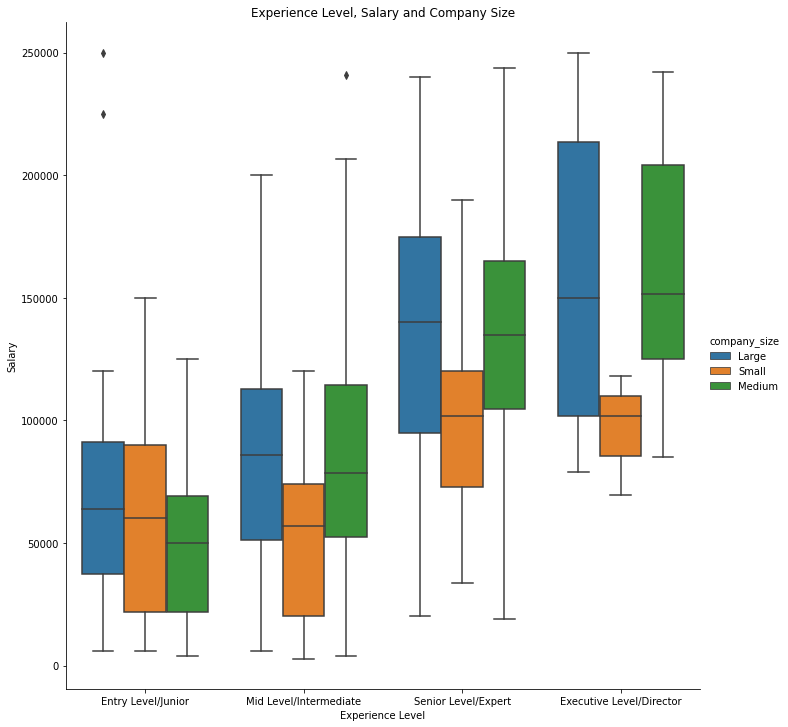

In [81]:
sns.catplot(data=data,
            x='experience_level',
            y ='salary_in_usd',
            order=experience_order,
            height= 10,
            kind='box',
            hue='company_size')

plt.title('Experience Level, Salary and Company Size')
plt.ylabel('Salary')
plt.xlabel('Experience Level');

Из представления видно, что специалисты уровня Senior получают большую зарплату, чем уровня Junior. Гипотеза верна.

Составим матрицу корреляции используя метод corr()

In [83]:
data[['work_year', 'salary', 'salary_in_usd', 'remote_ratio']].corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.284463,0.076314
salary,-0.087577,1.000000,-0.112184,-0.014608
salary_in_usd,0.284463,-0.112184,1.000000,0.141323
remote_ratio,0.076314,-0.014608,0.141323,1.000000


Вычислим показатели корреляции - ковариацию. Ковариация показывает меру линейной зависимости случайных величин.

Посчитаем ковариацию между зарплатой в долларах и годом работы.

In [84]:
X = data['salary_in_usd']
Y = data['work_year']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).mean()
cov

10986.057723049866

Тоже самое можно посчитать используя другую формулу:

In [85]:
cov = (X * Y).mean() - MX * MY
cov

10986.057723075151

Значения почти совпадают, хотя, не совсем. Это обусловлено тем, что приведённые выше формулы задают одну и ту же характеристику случайной величины, однако, в случае выборочного оценивания не совсем равны.

Можем посчитать ковариацию с помощью готовой функции numpy.cov:

In [86]:
X.var()

3123816922.163168

In [87]:
Y.var()

0.479048069551601

In [88]:
cov2 = np.cov(X, Y)
cov2

array([[3.12381692e+09, 1.10041865e+04],
       [1.10041865e+04, 4.79048070e-01]])

In [89]:
cov2[0][1] == cov

False

Функция cov() возвращает не значение ковариации, а т.н. матрицу ковариаций. В ней по диагонали стоят вариации (т.е. дисперсии) каждой из выборок, а вне диагонали - попарные ковариации.

Отметим, что значение ковариации массивов X и Y теперь уже заметно отличаются от посчитанных выше. Это связано с тем, что, как и для дисперсии и среднего квадратического отклонения, оценка ковариации, следующая из формул выше, является смещённой. Несмещённую оценку можно посчитать с помощью первой формулы, если в знаменатель подставить не n, а n - 1

In [90]:
cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov

11004.186531173711

Значение ковариации случайных величин сильно зависит от уровня разброса каждой из величин.

Поэтому в качестве числовой характеристики зависимости случайных величин лучше использовать коэффициент корреляции Пирсона. 

Посчитаем коэффициент корреляции:

In [91]:
corr = cov / (X.std() * Y.std())
corr

0.28446288458170693

Ту же самую матрицу корреляций можно получить с помощью функции numpy.corrcoef.

In [92]:
np.corrcoef(X, Y)

array([[1.        , 0.28446288],
       [0.28446288, 1.        ]])